In [14]:
from math import sqrt
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

def compute_gradient(image):
    filter1 = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    filter2 = np.array([[1,2,1], [0,0,0], [-1,-2,-1]])
    Gx = signal.convolve2d(image, filter1)
    Gy = signal.convolve2d(image, filter2)
    im_magnitude = np.sqrt(Gx**2+Gy**2)
    im_direction = (np.tan(Gx/Gy))**(-1)                   
    return Gx, Gy, im_magnitude,im_direction

In [4]:
import cv2
img = cv2.imread('./images/image2.jpg')
print(img.shape)
img = np.mean(img, axis=2)
print(img.shape)

(533, 800, 3)
(533, 800)


In [32]:
Gx, Gy, im_magnitude, im_direction = compute_gradient(img)

<ipython-input-30-84bf27ff19b9>:12: RuntimeWarning: divide by zero encountered in true_divide
  im_direction = (np.tan(Gx/Gy))**(-1)
<ipython-input-30-84bf27ff19b9>:12: RuntimeWarning: invalid value encountered in true_divide
  im_direction = (np.tan(Gx/Gy))**(-1)
<ipython-input-30-84bf27ff19b9>:12: RuntimeWarning: invalid value encountered in tan
  im_direction = (np.tan(Gx/Gy))**(-1)
<ipython-input-30-84bf27ff19b9>:12: RuntimeWarning: divide by zero encountered in reciprocal
  im_direction = (np.tan(Gx/Gy))**(-1)


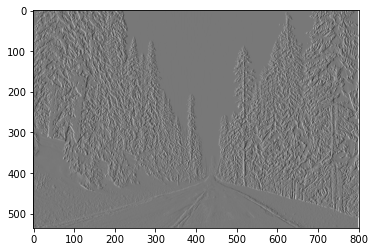

In [33]:
plt.imshow(Gx, cmap='gray')

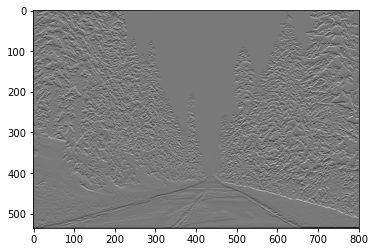

In [34]:
plt.imshow(Gy, cmap='gray')

In [29]:
import cv2
from gauss2D import gauss2D
from scipy.signal import convolve2d
import numpy as np
from math import pi, exp
from scipy.ndimage import laplace

def compute_LoG(image, LOG_type):
    sigma = 0.5
    kernel_size = 5

    if LOG_type == 1:
        gauss_kernel = gauss2D(sigma, sigma, kernel_size)
        smoothed_image = convolve2d(image, gauss_kernel)
        imOut = laplace(smoothed_image)

    elif LOG_type == 2:
        LoG_kernel = np.zeros((kernel_size, kernel_size))
        
        for i in range(kernel_size):
            for j in range(kernel_size):
                LoG_kernel[i][j] = (
                    (- 1/(pi * sigma**4)) *
                    (1 - (i**2 + j**2)/ (2*sigma**2)) * 
                    exp(-(i**2 + j**2)/(2*sigma**2)))
        
        imOut = convolve2d(image, LoG_kernel)
        

    elif LOG_type == 3:
        sigma2 = 0.8
        gauss_kernel1 = gauss2D(sigma, sigma, kernel_size)
        gauss_kernel2 = gauss2D(sigma2, sigma2, kernel_size)
        DoG_kernel = gauss_kernel1 - gauss_kernel2
        imOut = convolve2d(image, DoG_kernel)
        
    return imOut

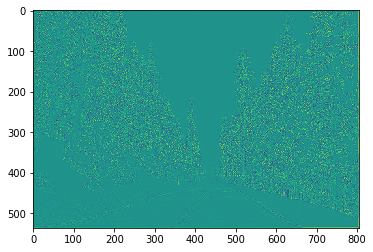

In [30]:
im1 = compute_LoG(img, 1)
plt.imshow(im1)

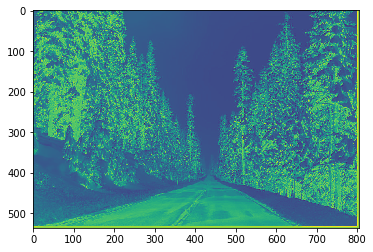

In [31]:
im2 = compute_LoG(img, 2)
plt.imshow(im2)

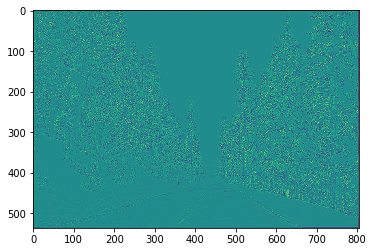

In [32]:
im3 = compute_LoG(img, 3)
plt.imshow(im3)